# Analise Explorátoria dos dados

In [124]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [125]:
df = pd.read_csv('./playground-series-s4e2/test.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


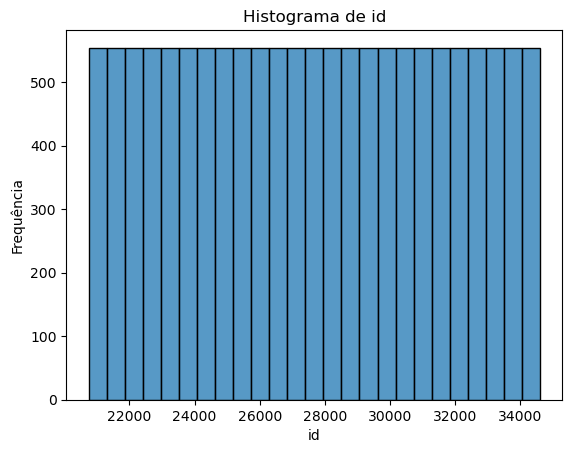

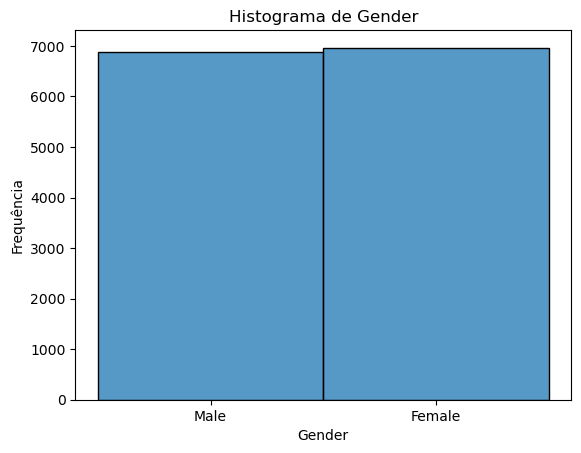

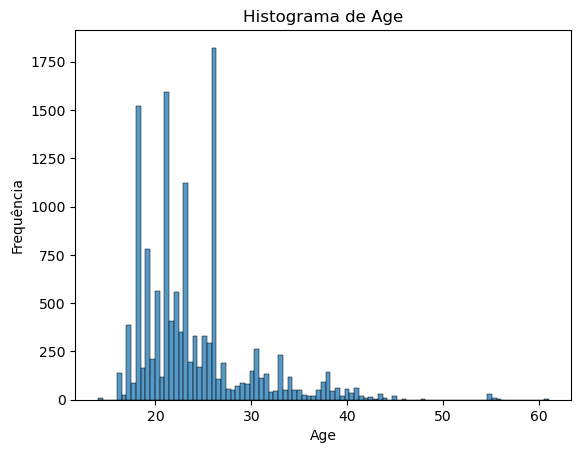

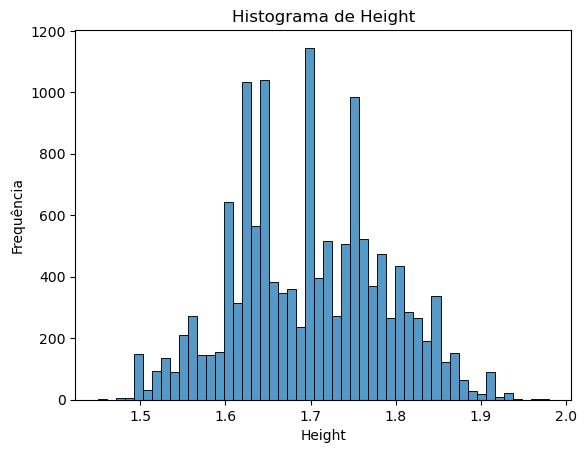

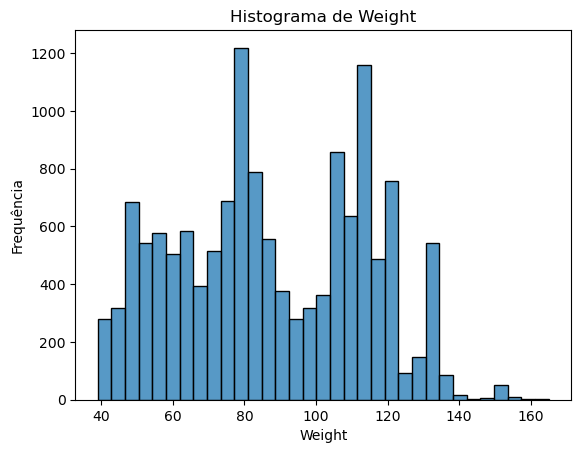

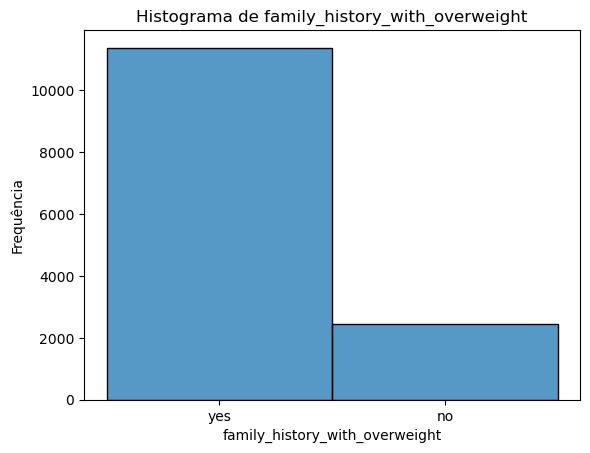

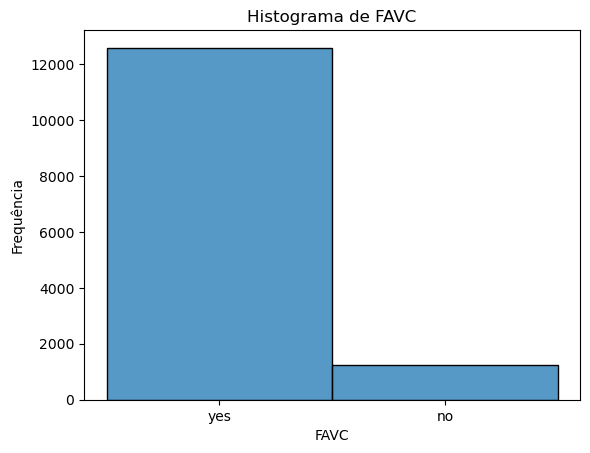

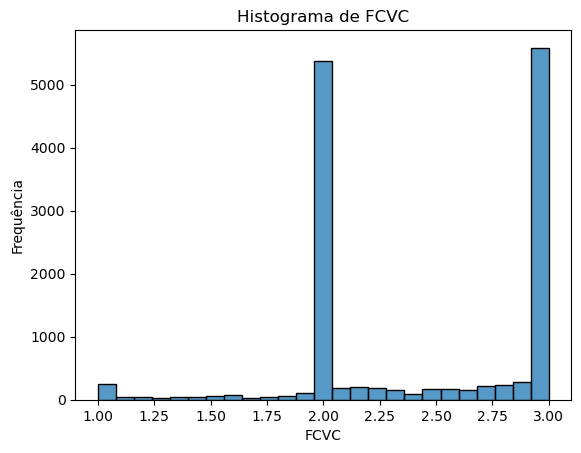

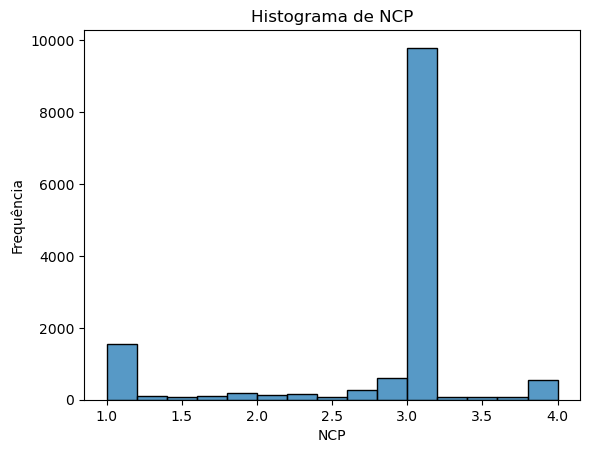

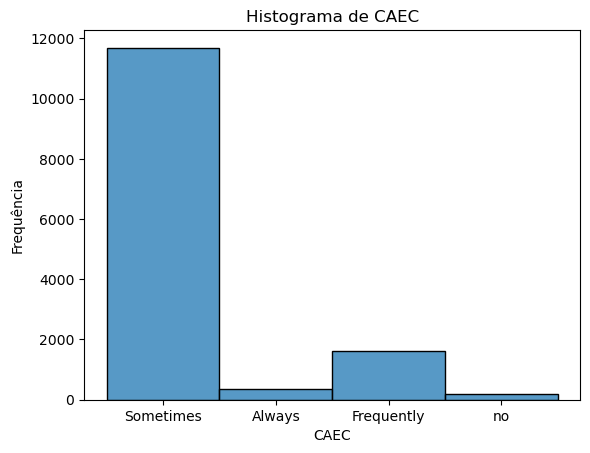

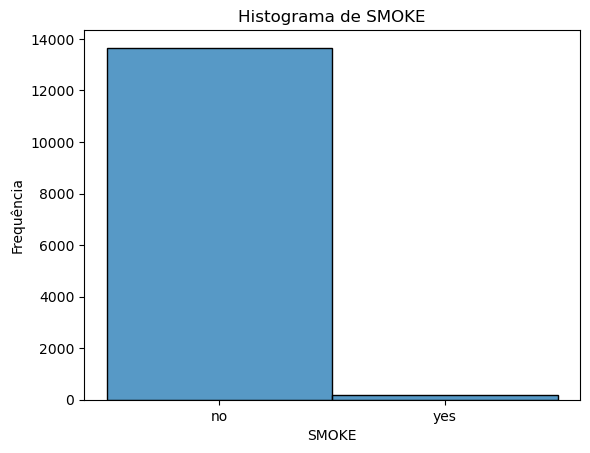

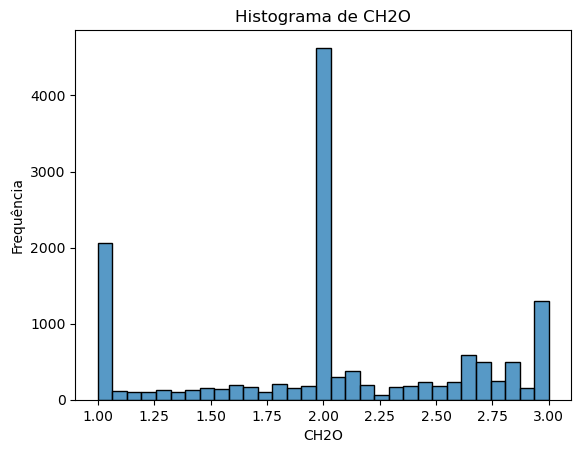

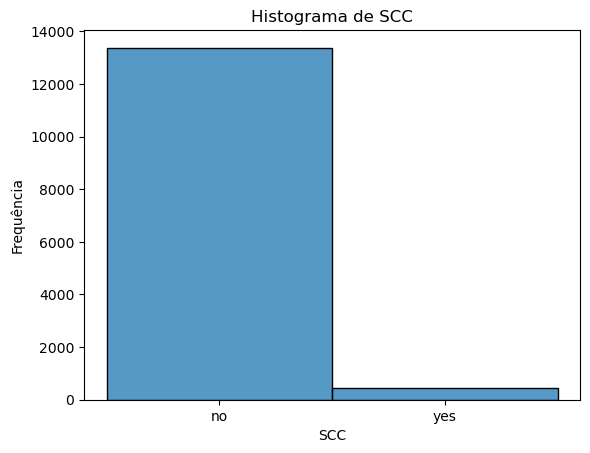

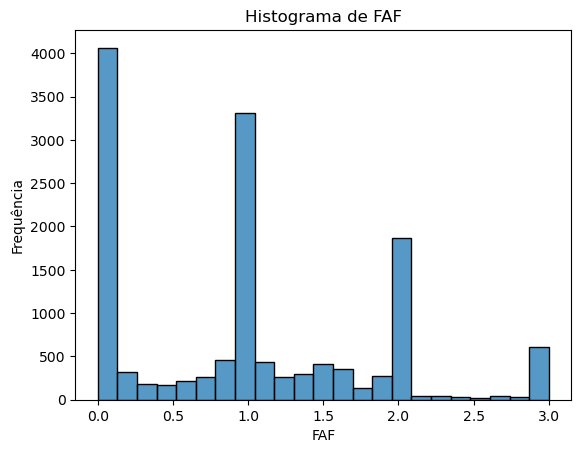

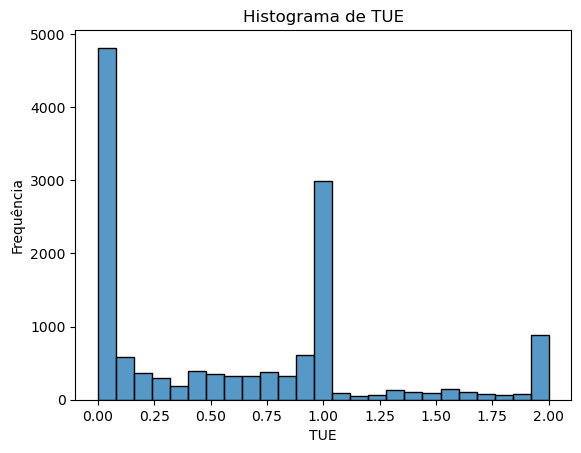

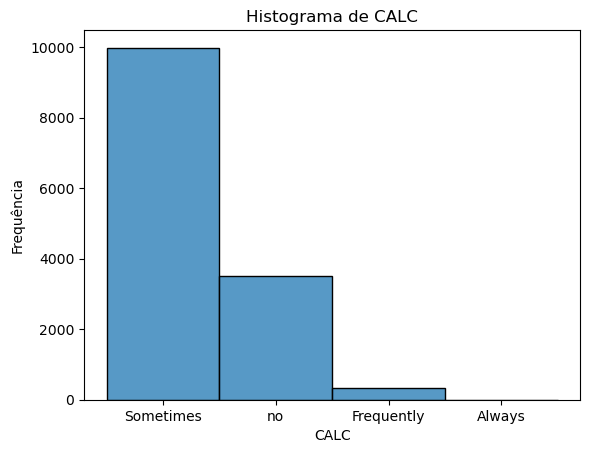

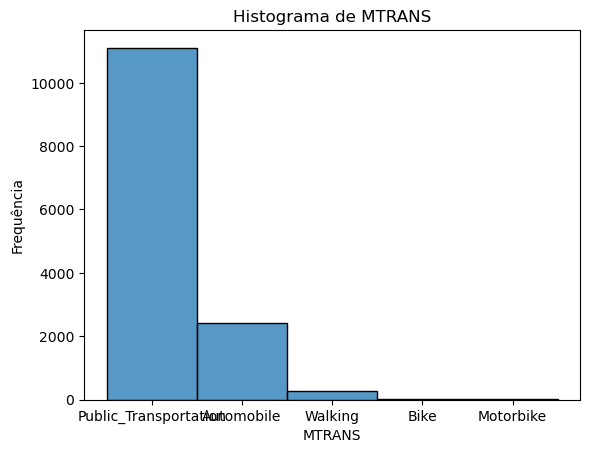

In [126]:
for col in df.columns:
    sns.histplot(df[col], kde=False)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

In [127]:
number = df.select_dtypes(include=np.number)
number.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


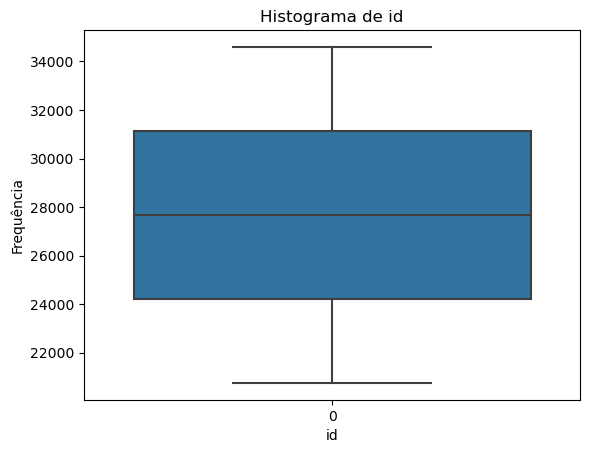

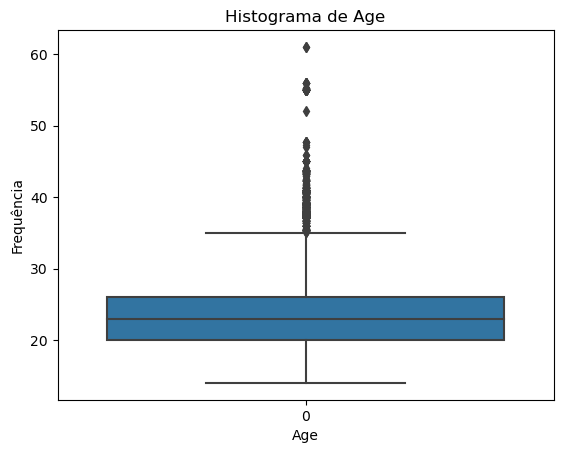

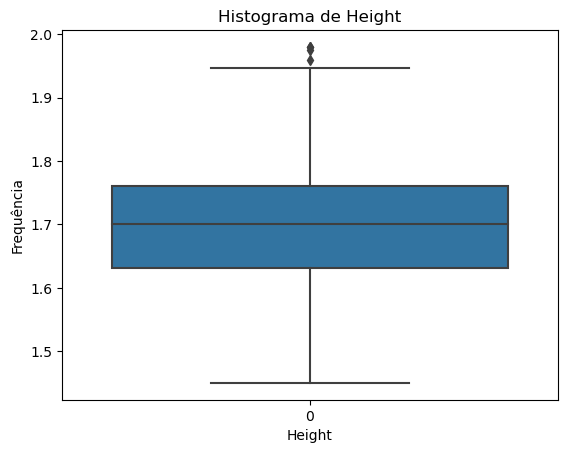

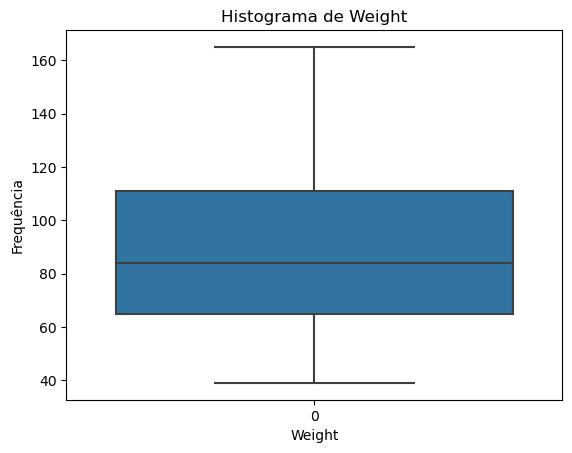

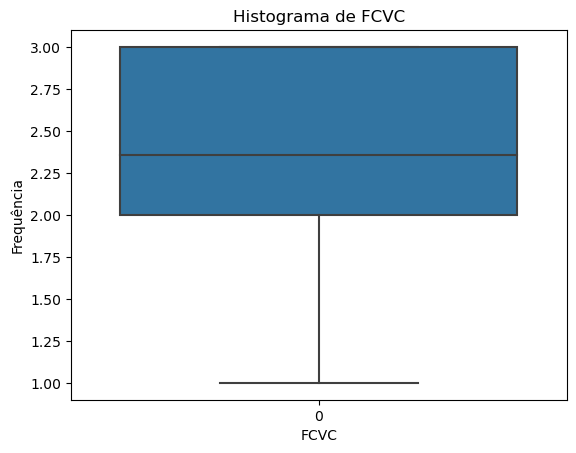

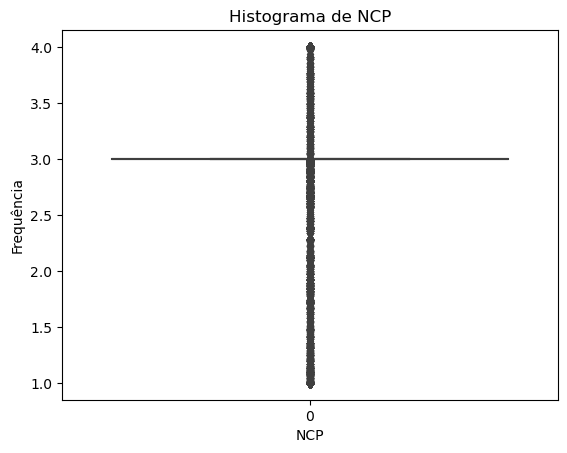

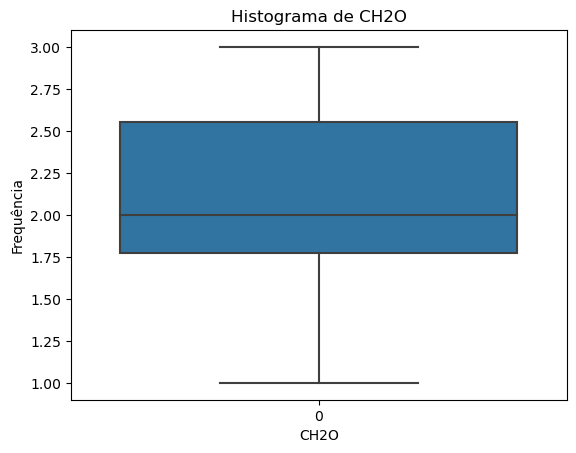

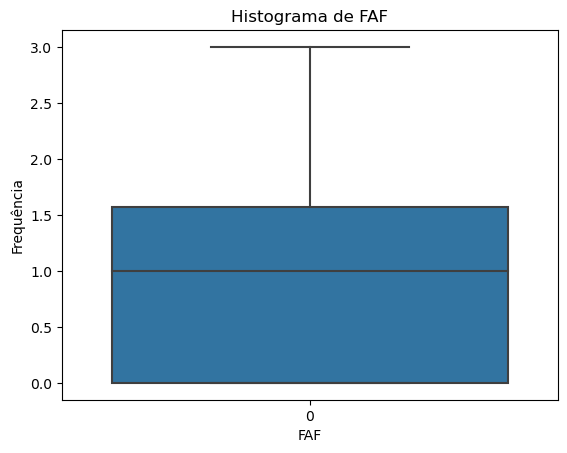

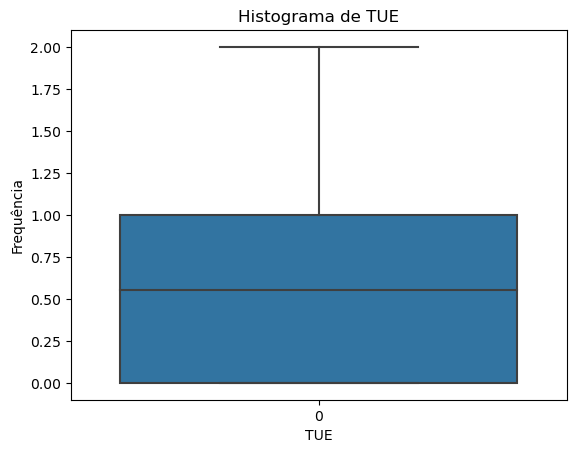

In [128]:
for col in number.columns:
    sns.boxplot(df[col])
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

In [129]:
letters = df.select_dtypes(include=np.object_)
letters.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,13840,13840,13840,13840,13840,13840,13840,13840
unique,2,2,2,4,2,2,4,5
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,6965,11384,12583,11689,13660,13376,9979,11111


FAVC - > Consumo de comida de alta caloria, yes or no binarizado 

Smoke - > yes or no, binarizado 

CAEC - > Consumo de comida entre as refeições, Label enconder porque depende da frequência\n

SCC - > Monitoria do consumo de categoria, yes or no binarizado

MTRAS -> Meio de transporte: One Hot Enconder

NObeysedad -> Usaremos o label enconder para criar graus de obesidade 


In [130]:
col_to_one_hot = ['Gender','MTRANS']
transformador = ColumnTransformer(
    transformers=[('', OneHotEncoder(), col_to_one_hot)],
    remainder='passthrough'  # mantém as colunas não transformadas
)

In [131]:
df_transformado = transformador.fit_transform(df)

# Convertendo a saída de volta para um DataFrame (opcional)
df_transformado = pd.DataFrame(df_transformado, columns=list(transformador.get_feature_names_out(df.columns)))
df_transformado.head()

,__Gender_Female,__Gender_Male,__MTRANS_Automobile,__MTRANS_Bike,__MTRANS_Motorbike,__MTRANS_Public_Transportation,__MTRANS_Walking,remainder__id,remainder__Age,remainder__Height,...,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20758,26.899886,1.848294,...,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.0,Sometimes
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20759,21.0,1.6,...,yes,2.0,1.0,Sometimes,no,3.0,no,1.0,0.0,Sometimes
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20760,26.0,1.643355,...,yes,3.0,3.0,Sometimes,no,2.621877,no,0.0,0.250502,Sometimes
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20761,20.979254,1.553127,...,yes,2.0,2.977909,Sometimes,no,2.786417,no,0.094851,0.0,Sometimes
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20762,26.0,1.627396,...,yes,3.0,3.0,Sometimes,no,2.653531,no,0.0,0.741069,Sometimes


In [132]:
df_transformado.columns

Index(['__Gender_Female', '__Gender_Male', '__MTRANS_Automobile',
       '__MTRANS_Bike', '__MTRANS_Motorbike', '__MTRANS_Public_Transportation',
       '__MTRANS_Walking', 'remainder__id', 'remainder__Age',
       'remainder__Height', 'remainder__Weight',
       'remainder__family_history_with_overweight', 'remainder__FAVC',
       'remainder__FCVC', 'remainder__NCP', 'remainder__CAEC',
       'remainder__SMOKE', 'remainder__CH2O', 'remainder__SCC',
       'remainder__FAF', 'remainder__TUE', 'remainder__CALC'],
      dtype='object')

In [133]:
label_encoder = LabelEncoder()
label_encoder.fit(['no','yes'])
bins_coluns = ['remainder__family_history_with_overweight', 'remainder__FAVC','remainder__SMOKE']
label_encoder.fit(bins_coluns)
for coluna in df_transformado[bins_coluns]:
    if df_transformado[coluna].dtype == 'object':  # Verificar se a coluna contém dados categóricos
        df_transformado[coluna] = label_encoder.fit_transform(df_transformado[coluna])

df_transformado.head()

,__Gender_Female,__Gender_Male,__MTRANS_Automobile,__MTRANS_Bike,__MTRANS_Motorbike,__MTRANS_Public_Transportation,__MTRANS_Walking,remainder__id,remainder__Age,remainder__Height,...,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20758,26.899886,1.848294,...,1,2.938616,3.0,Sometimes,0,2.825629,no,0.8554,0.0,Sometimes
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20759,21.0,1.6,...,1,2.0,1.0,Sometimes,0,3.0,no,1.0,0.0,Sometimes
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20760,26.0,1.643355,...,1,3.0,3.0,Sometimes,0,2.621877,no,0.0,0.250502,Sometimes
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20761,20.979254,1.553127,...,1,2.0,2.977909,Sometimes,0,2.786417,no,0.094851,0.0,Sometimes
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20762,26.0,1.627396,...,1,3.0,3.0,Sometimes,0,2.653531,no,0.0,0.741069,Sometimes


In [134]:

df_transformado['remainder__SCC'] = df_transformado['remainder__SCC'].map({'yes':0, 'no':1})
df_transformado.head()

,__Gender_Female,__Gender_Male,__MTRANS_Automobile,__MTRANS_Bike,__MTRANS_Motorbike,__MTRANS_Public_Transportation,__MTRANS_Walking,remainder__id,remainder__Age,remainder__Height,...,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20758,26.899886,1.848294,...,1,2.938616,3.0,Sometimes,0,2.825629,1,0.8554,0.0,Sometimes
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20759,21.0,1.6,...,1,2.0,1.0,Sometimes,0,3.0,1,1.0,0.0,Sometimes
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20760,26.0,1.643355,...,1,3.0,3.0,Sometimes,0,2.621877,1,0.0,0.250502,Sometimes
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20761,20.979254,1.553127,...,1,2.0,2.977909,Sometimes,0,2.786417,1,0.094851,0.0,Sometimes
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20762,26.0,1.627396,...,1,3.0,3.0,Sometimes,0,2.653531,1,0.0,0.741069,Sometimes


In [135]:
df_transformado['remainder__CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [136]:
df_transformado['remainder__CALC'] = df_transformado['remainder__CALC'].map({'Sometimes':1,'no':0,'Frequently':2})
df_transformado.head()

,__Gender_Female,__Gender_Male,__MTRANS_Automobile,__MTRANS_Bike,__MTRANS_Motorbike,__MTRANS_Public_Transportation,__MTRANS_Walking,remainder__id,remainder__Age,remainder__Height,...,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20758,26.899886,1.848294,...,1,2.938616,3.0,Sometimes,0,2.825629,1,0.8554,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20759,21.0,1.6,...,1,2.0,1.0,Sometimes,0,3.0,1,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20760,26.0,1.643355,...,1,3.0,3.0,Sometimes,0,2.621877,1,0.0,0.250502,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20761,20.979254,1.553127,...,1,2.0,2.977909,Sometimes,0,2.786417,1,0.094851,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20762,26.0,1.627396,...,1,3.0,3.0,Sometimes,0,2.653531,1,0.0,0.741069,1.0


In [137]:
#df_transformado['remainder__NObeyesdad'].unique()

In [138]:
#df_transformado['remainder__NObeyesdad'] = df_transformado['remainder__NObeyesdad'].map({'Overweight_Level_II':3, 'Normal_Weight':1, 'Insufficient_Weight':0,
#       'Obesity_Type_III':6, 'Obesity_Type_II':5, 'Overweight_Level_I':2,
#       'Obesity_Type_I':4})
#df_transformado.head()

KeyError: 'remainder__NObeyesdad'

In [ ]:
df_transformado['remainder__CAEC'].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [ ]:
df_transformado['remainder__CAEC'] = df_transformado['remainder__CAEC'].map({'Sometimes':1,'no':0,'Frequently':2,'Always':3})


In [ ]:
df_transformado.to_pickle('to_gaussian_nb_test.pkl')